# Тематическое моделирование

Концепция **тематического моделирования** уже знакома вам по курсу "Анализа текста". Давайте еще раз поработаем с этой темой, но на пайтоне.

**Тематическое моделирование** — способ построения модели коллекции текстовых документов, которая определяет, к каким темам относится каждый из документов (wiki). Тематическое моделирование основано на предположении, что каждый документ представляет собой смесь нескольких тем, а каждая тема — это набор слов, которые часто встречаются вместе.

Применение у тематического моделирования крайне широкое: 

1. Изначально - исследование специальных текстов;
2. Научные, например, филологические задачи (выявление тем в художественных данных, в эпистолярии, публицистике и т.д.);
3. Выявление основных тем при коммерческом анализе (отзывов на рестораны, обсуждений политики и т.д.);
4. Группировка документов по темам при поиске (информационный поиск);
5. Исследования трендов;
6. Рекомендательные системы (на основе предпочтений предлагать материалы с определенными темами);
7. и многое другое.

## Пара кейсов 
https://publications.hse.ru/pubs/share/direct/801379894.pdf - исследование Т. Ю. Шерстиновой и коллег из Питерской Вышки на основании русского расказа 1900-1930-х гг. Содержательные выводы:
1. Наблюдается содержательная динамика частотных тем по разным временным периодам. Поэтому хотя тематические модели далеко не всегда являются отражением собственно «тематики» литературного текста, тем не менее их можно рассматривать как тематикостилистический маркер анализируемой коллекции текстов.
2. Частотные темы, построенные на небольших выборках, трансформируются или перераспределяются на выборках большего объема, некоторые темы можно считать универсальными (сквозными) для всех трех рассмотренных периодов. Топики на больших выборках в среднем выглядят более конкретными с содержательной точки зрения.
3. Разнообразие частотных топиков выше во втором и третьем периоде — для выборок в 500 и 1000 рассказов. Очевидно, это определяется большим лексико-стилистическим разнообразием прозы «эпохи перемен». И это несмотря на то, что для первого периода выборка содержит максимальное количество разных авторов.
4. В случае работы с художественным текстом оценка адекватности модели посредством оценки интерпретируемости порожденных тем является непростой задачей. Традиционные подходы, предполагающие понимание экспертом значения «удачного» топика, в некоторых случаях оказываются затруднительными, поскольку тема может представлять собой как группу семантически близких слов, так и свертку сюжета, а также подвергаться влиянию образности художественного языка и имплицитных смыслов произведения. Поэтому вопрос правильного подхода к оценке интерпретируемости результатов работы модели на материале художественной прозы должен стать темой отдельного исследования.
5. Даже в том случае, когда конкретно выделенный топик является хорошо интерпретируемым и рассказ относится к нему с большой вероятностью, ключевые слова одного единственного топика как правило не исчерпывают основные тематические категории рассматриваемого текста.

https://academic.oup.com/dsh/article/39/1/142/7515230 - свежее исследование по литературным интервью из The Paris Review, по 404 интервью 399 авторов (2,6 млн токенов).

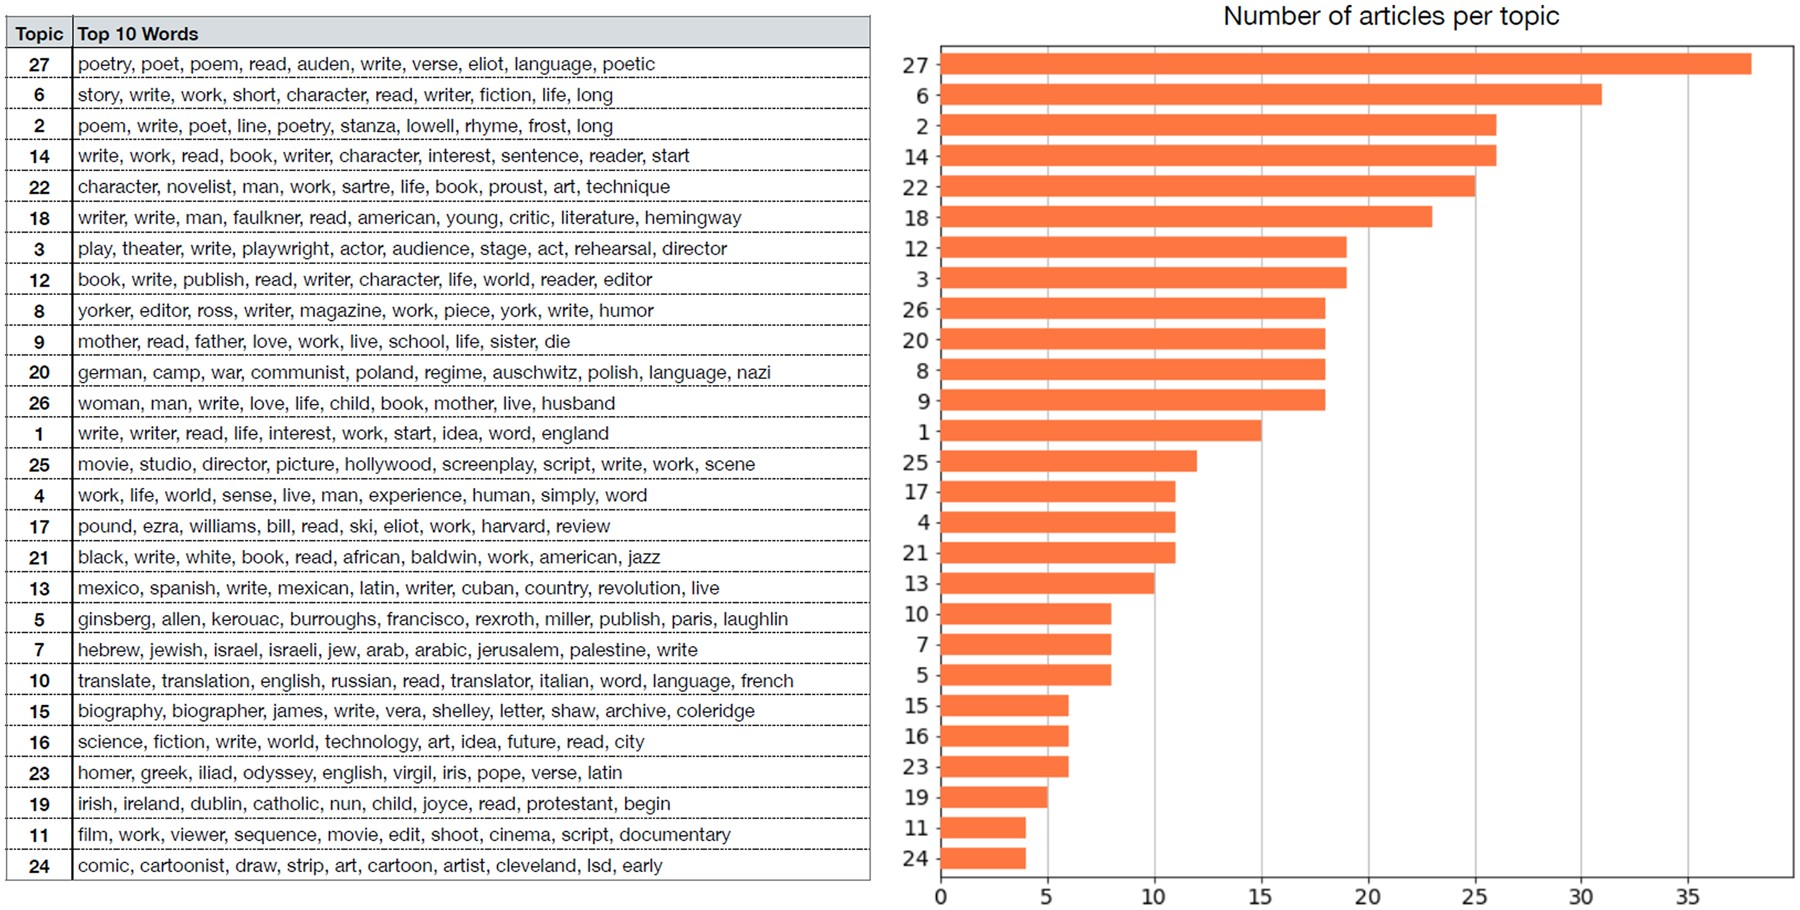

## Примерный пайплайн работы с тематическим моделированием: 
1. Выбор корпуса;
2. Токенизация и очистка от стоп-слов;
3. Лемматизация корпуса;
4. Составление словаря для модели;
5. Определение оптимального количества кластеров;
6. Обучение модели.

Один из самых легкодоступных ресурсов для топик-моделинга — это уже знакомый вам gensim.

## Пример на одном тексте

In [ ]:
import os
import pandas as pd
import numpy as np
import gensim
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer
import matplotlib.pyplot as plt
from collections import Counter
morph = MorphAnalyzer()
stopwords_ru = stopwords.words('russian') + ['это', 'мочь', 'который', 'всё', 'весь', 'ещё', 'ваш', 'свой', 'каждый']

In [ ]:
import stanza
nlp = stanza.Pipeline(lang='ru', processors='tokenize,ner')

In [ ]:
#pip install pyLDAvis
from gensim.models import LdaModel
from gensim import corpora
import pyLDAvis.gensim_models
import re

Возьмем следующее письмо Достоевского:

In [ ]:
letter = '25 сентября 1831 г. Москва Не вините ни почту, ни черкесов, ни чуму, ни холеру, незабвенный мой Александр Александрович,-- вините одного меня, меня, в моем молчании, бессовестном, непростительном! С марта молчу я, не писал к вам ни одной строчки; когда и без того целые месяца идет от вас или к вам письмо -- я полгода промедляю, не отвечаю даже на ваши письма, истинную утеху души моей, высокое наслаждение моего сердца! Да, я говорю это вам, как на исповеди, и божусь всем, что еще есть для меня в мире драгоценного,-- это святая правда! Причина молчания во мне самом и более ни в ком и ни в чем. Не знаю, известна ли кому наша переписка, не знаю, что могут из нее заключить. Но, чистый совестью; не боюсь я никого и ничего. Дайте мне хоть в воображении поцеловать и крепко обнять вас! Испытанный жизнью, Бестужев сам не может видеть и ценить себя, но я вижу, чувствую, понимаю его -- и бог знает чем бы ни заплатил, если бы мог его теперь укрыть в мои объятия, мог сам укрыться на грудь человека от людей. Да, мой незабвенный А<лександр> А<лександрович>, они истерзали, измучили меня. Это звери, это какие-то центавры с человеческими рожами и с звериными остальными членами. Не выключаю и себя. Хаос души моей мне самому часто непонятен. Грущу, терзаюсь, не видя в себе самом определенного, чистого стремления к небесам. Чувствую, как земля просит своего. Казалось бы, пора решить задачу бытия для самого себя, пора определить цель земной жизни. Расчет короткий, дело ясно. Судьба предоставила мне редкий удел какого-то экономического счастия. Рожденный бедным купцом, с заботами о существовании своем и многочисленного семейства, я успел физически укрепить их и свое бытие. Этого мало: она дала мне средства сделаться почетным в ряду моих сограждан, драгоценное доброе имя заменяет в глазах их недостаток денег, и имя Полевого они считают честью. Этого мало: семейство у меня премилое. Если бы вы знали моего брата (Ксенофонта, а не Петра -- он соименник товарищу младшего Кира, ученику Сократа, а не апостолу Петру),-- такой души редко<й>: это волкан под ледяною корою. Он меня любит, как любовницу, а я его еще более, ибо чувствую, что он мое создание. Шестеро малюток моих прелестны, младший сын -- настоящий ангел! Остальное семейство мое -- добрейшие, благороднейшие души. Вот физический мир мой. А метафизический? Не буду скрываться перед вами, сказав, что чувствую свое прекрасное назначение содействовать благу отчизны таким делом, которого никакая сила запретить мне не может,-- разумею литературу. Литературное поприще в России необозримо, и в десять лет литературного бытия я уже успел во многом быть полезным -- это я слышу, чувствую, понимаю. Работа для меня ничего не стоит, работаю больной и здоровый, веселый и печальный, с целью и без цели, с совершенною уверенностью, что вся награда в труде, не ожидая ничего, даже думая, что в наш век всеобщих переломов -- политических, моральных, ученых -- нельзя работать на века. Этот метафизический мир для меня тем дороже, что я сам его создал для себя, сам образовал себя для этого мира, беру с бою, без покровительства, без выслуги, смело объявляя войну пошлой знаменитости и сильному невежеству. Двадцати лет начал я учиться, сам, без руководства, в глуши, только с братом, на книжонки, купленные из бедного остатка денег, которых у меня было тогда меньше, нежели ничего. Мысль, что теперь в России могу причислять себя к людям, знакомым со всеми европейскими идеями,-- мысль усладительная! Вот вам светлая сторона моего бытия, милый мой Александр Александрович! Теперь загляните в темную. С чего начать? Может быть, с того, что каждый, дерзнувший выступить дальше битой дороги, платит за это тяжело и ужасно, и в себе, ив людях! Человек -- кусок мяса -- требует счастья, которого никогда и никто не сыскал. По крайней мере, нет счастья для тех, которые прыгают чрез людские головы. Чувство вечной деятельности духа, вечной борьбы не есть счастье: это труд, а счастье есть отдых. Мне мало того дыханья, которым дышут все, я не могу плясать под тот оркестр, под который все танцуют,-- и прощай мир души! Бури страстей, таимые в душе с малолетства, никогда не разыгрывались у меня в вихрях порока и низких страстишек; никогда и не разыграются. Но каково же это? Мелкое честолюбие, мирская любовь, светская дружба... не были моими идолами. Той, которую любил бы я, прежде всего сказал бы: "Умрем вместе!" и посмотрел бы, как она стала вывертывать у меня свою ручку <и> шептать: "Он сумасшедший!" и с ловким книксеном спряталась бы за какую-нибудь пустоголовую фигуру. Буттер-бродовые души! Так во всем, и чем далее, тем более! И какое же следствие? Недовольство другими? Это еще не беда, но -- ужасное неудовольство самим собою -- это Жан-Полев демон, который одним ногтем сколупнул солнце с неба,-- он начнет терзать, мучить, и силу этого демона я испытываю вполне! Он отравляет мне все; он ясно показывает мне мое бессилие, мою бессмысленность, мое ничтожество как человека, как гражданина, как писателя. Не называйте этого честолюбием, тщеславием -- нет, это какое-то странное волнение души, от которого часто кровь кипит во мне, как в котле, и бросается вся к сердцу и в голову. Меряю честолюбие других -- как ничтожно; прикидываю счастье иных -- какая гадкая проза... Но я не могу изъяснить вам ничего более, и если из моих разбросанных слов вы ничего не поняли,-- не поймете никогда и ничего. Страннее всего, что я не впадаю от этого ни в сплин, ни в хандру; наружность моя спокойна, ни одной душе не сказывается душа моя; люди дивятся моей деятельности, не чувствуя, что эта деятельность у меня лекарство и похожа на прогулки, которые велят делать больному. Одно, что осталось,-- действовать к добру, сколько могу, и мысль, что, если это действование должно убить меня, то смерть, при совершенном обессилении на поприще деятельности, конечно, есть все то, что должно человеку сделать. Иногда сам удивляюсь своей живучести, иногда это мне досадно даже... Скорее бы, скорее!.. Но, видимо, еще не время! Воображаю себе солдата, который шел в битву. Если бы он дошел, то отличился бы, как герой, но -- длинный переход в бесплодной, безводной степи уморил его, и, не дошедши до неприятельских батарей, он упал и умирает от голода и усталости... Это я! Может быть, никто не подозревает в хладнокровном издателе "Телеграфа" такое странное создание. Это мне часто бывает забавно! И как немного людям надобно? Трогай их краешком сердца, кусочком души -- этого товара так мало у них, что они изумляются обилию его у вас. Говорят, что я добрый семьянин, почтенный человек в обществе, что я делаю добро, но -- ради бога! если бы я этим не был, я был бы чудовище; об этом и говорить нечего, мне кажется, так как нечего хвалить человека, если он не бездельничает. Моя идея добра и счастья -- душит меня -- она неисполнима... Но я забылся, пишу, пишу -- не имею сил прочесть написанного, но чувствую, что я до сих пор говорил только о себе. Неужели я так самолюбив? Неужели мое "я" так любопытно? Но я хотел раскрыть себя перед Бестужевым-- пусть он любит или ненавидит меня, зная хорошо. Но -- еще несколько слов: не написал ли я, что я не люблю людей? Это клевета на себя! Не сказал ли, что они никуда не годятся, что я их ненавижу, презираю? Это клевета на них! Они -- глина и бог; но бог в каждом из них есть; в руде каждого человека хоть крупинка чистого золота всегда сохраняется. Не слишком ли много мы от них требуем? Зачем спрашиваем у каждого, чего должно спрашивать только у избранных? Чувствую, что на меня находит мой добрый стих... Мысль о вас отравляет его в эту минуту... Милый Бестужев! Послушайте,-- чувствуете ли вы свое перерождение, чувствуете ли, что ветхий Адам свалился с вас, как чешуя с глаз Савла, при громе бедствий и буре страданий, вами испытанных? Разгадайте, узнайте эту светлую идею и дорожите жизнью, дорожите собою! Уже десять лет я вас знаю. Какое сравнение между тем вихренным Бестужевым, которого видел я некогда в шуме Петербурга, и Бестужевым, который писал "Письмо к Эрдману" с Лены и с Кавказа. Но вот где он, этот Бестужев,-- в письмах ко мне! В этой драгоценности, которую будут читать и плакать через несколько веков. Только тем, которые прошли, узнали тяжкую школу бедствий, так чувствовать и мыслить. Сличаю себя с вами -- какая разница, какое расстояние! Не знаю, что такое беспорядочное, нестройное вижу в себе, и какая гармония, какая светлость, какая ровная сила в Бестужеве Ваша поэзия не имеет нужды в стихах, даже в словах -- сказал бы, если бы другие без слов могли понимать ее. Вам тяжко, милый мой А<лександр> А<лександрович>, тяжко физически, но -- иногда приходит мне в голову: не все ли прекрасное есть молитва от демона земли или вопль страдающих в когтях этого демона? Гете говорил, что он сошел бы с ума, если бы не написал "Фауста". Какая задача для решения! Мне думается, мне мечтается, что Бестужеву не суждено погибнуть за Кавказом, что ударит час соединения его со мною, что минута мира возвратит его нам.-- Ах! Я готов бы молиться не только богу, но, как Гальба, искать алтарей новых богед и их утруждать моею мольбою! До тех пор, ради всего великого и прекрасного, храните себя -- вы сами храните, а бог не погубит безвременно ни такой души, ни такой головы. Знаете ли, что все узнают каждую вашу строчку? Западает ли она в болото "Тифлисских ведомостей", садят ее в помещичий огород Греча или является она в "Телеграфе" -- все равно: она узнана и оценена! Вот тут-то и является в каждом нечто божественное. Ведь есть же нечто, сказывающее другим: "Это гений Бестужева!" Ваш "Белозор" -- прелесть неоценимая. Никогда Ирвинг не казался мне так спел и сочен. "Ужасное гаданье" -- создание глубокое и высокопоэтическое. Еще не принимался я за "Аммалата-Бея" -- для чего? Берегу, когда мне будет или слишком тяжко, или очень хорошо. Тогда или украшу им час скорьби, или увеличу им минуту радости. Так читаю я Шекспира и Байрона. И вы упоминаете о пересылке "Аммалат-Бея" к Гречу? Послушайте,-- это было в последний раз и в первый -- и более никогда уже я от вас я этого не услышу? Не правда ли? Если бы можно было, я не позволил бы в страницах Греча являться ни одной букве Марлинского. Но на сей раз довольно. Читайте, судите меня, браните или хвалите.-- Кто сам себе не отдает в себе отчета, перед кем загадка бытия запутывается тем более, чем более идет он по пути жизни,-- чем тому оправдываться, что сказать... Это письмо писал я к вам в три приема и так буду отныне делать. Моя исповедь, биография, все, что пробегает в голове, решаюсь я отныне ежедневно записывать на листочки бумаги и эти записывания по прошествии каждой недели или двух посылать к вам --это будут мои письма к вам; иначе не могу, и вы будете по полугоду не получать ни одного слова. Сесть с тем, чтобы писать письмо к вам -- я не в силах, я задохнусь на другой страничке... Несколько хозяйственных слов. Все, что вы заказывали, было посылаемо и посылается к вам. Только патранцов или дудочек нельзя было заказать, потому что здесь все обязаны подпискою не делать ничего подобного без спроса правительства -- следственно: игра не стоила свеч. И еще помню, что не послана доныне материя на какое-то черкесское одеяние. Вы забыли написать, сколько аршин ее надобно, а по названию никто не мог здесь растолковать, что это: куртка или огромный халат. Пишите, заказывайте -- все исполнено будет. Между тем я еще у вас в долгу и давно бы послал к вам мой долг, но -- как это сделать? Можно ли по обыкновенному вашему адресу? Боюсь повредить вам даже и неумышленным поступком. Уведомьте. Посылаем вам при сем "Notre Dame de Paris" В. Гюго -- произведение, изумившее Францию. В два месяца вышло этой книги шесть или семь изданий. Не предупреждаю суда вашего и потом скажу мое мнение. Кланяйтесь Ивану Петровичу. Ему собственно отдельная книга. Ваш всегда Н. Полевой. По 25-е сент<ября> 1831 г. Москва.'
print(letter)

Почистим документ от лишних именованных сущностей:

In [ ]:
doc = nlp(letter)
print(doc.ents)

In [ ]:
l_entities = [entity.text for entity in doc.ents]
print(l_entities)

In [ ]:
letter_e = letter
for entity in l_entities:
    letter_e = re.sub(f'{entity}', '', letter_e)
print(letter_e)

Отлично, теперь у нас не будет "вредных" имен, которые могут нам попортить жизнь. Здесь мы удалили все, хотя чаще нужно удалять только персоналии. Как в кейсе с интервью выше - имена могут наоборот играть существенную роль (например, тема геноцида или Холокоста очевидным образом ассоциирована со словом "Аушвиц"). Однако сейчас мы работаем с письмами и всевозможные обращения нам скорее вредят, а главное заставят модель переобучиться.

Лемматизируем и очистим от стоп-слов:

In [ ]:
letter_r = re.sub('[^а-яА-Я ]', '', letter_e)
letter_r = re.sub('ё', 'е', letter_r)
lem_letter = [morph.parse(tok)[0].normal_form for tok in word_tokenize(letter_r) if morph.parse(tok)[0].normal_form not in stopwords_ru and len(morph.parse(tok)[0].normal_form) > 1]
print(len(lem_letter))
print(lem_letter)

После этого нужно сделать генсимовский словарь: 

In [ ]:
dictionary = corpora.Dictionary([lem_letter])
print(dictionary)

И сделать мешок слов (на одном тексте это выглядит пока странно):

In [ ]:
corpus = [dictionary.doc2bow(lem_letter)]
print(corpus)

Дальше осталось только применить знакомый вам алгоритм LDA — вероятностная модель, основанная на **распределении Дирихле**. Алгоритм разбивает тексты на слова и определяет их частотную совместную встречаемость, на основе чего выделяются группы таких слов, а затем каждый документ получается распределение своих тем. Иначе говоря, каждый документ делится на темы, а темы — на слова.

Атрибуты там следующие:  
gensim.models.LdaModel(
    corpus=None,
    num_topics=100,
    id2word=None,
    distributed=False,
    chunksize=2000,
    passes=1,
    update_every=1,
    alpha='symmetric',
    eta=None,
    decay=0.5,
    offset=1.0,
    eval_every=10,
    iterations=50,
    gamma_threshold=0.001,
    minimum_probability=0.01,
    random_state=None,
    ns_conf=None,
    minimum_phi_value=0.01,
    per_word_topics=False,
    callbacks=None,
    dtype=<css 'numpy.float32'>,
)

1. **corpus** принимает, собственно, корпус;
2. **num_tokens** - количество тем;
3. id2word - указание айди или самих токенов при работе модели;
4. distributed - True для обучения на мощных машинах (распределенное обучение), но на наших компьютерах имеет смысл всегда False);
5. chunksize - количество документов, обрабатываемых за один проход во время обучения (2000 по умолчанию);
6. passes - количество проходов через весь корпус во время обучения;
7. update_every - еще один параметр скорости, как часто обновляются веса/параметры в модели (1 - после каждого прохода);
8. **alpha** - контролирует "размазанность" тем по документам. Два варианта - symmetric (все темы имеют одинаковый априорный вес)/asymmetric (темы имеют разные веса).
9. **eta** - контролирует насколько слова распределены по темам. Низкое значение делает темы более узкими. NB! настройка alpha & eta процесс сложный и эзотерический.
10. decay - коэффициент затухания для учета старых данных при обновлении модели в онлайн-режиме. Чем ближе к 0.5 и дальше от 1, тем меньший вес имеют новые данные.
11. offset - стабилизация обучения на ранних этапах, снижает влияние первых документов при увеличении значения.
12. eval_every - частота оценки перплексии, по умолчанию 10, т.е. каждые 10 чанков, нужно для контроля качества модели.
13. iterations - количество итераций на оптимизацию параметров. Влияет на точность распределения тем в документах. Большее значение улучшает качество, но увеличивает время обучения.
14. random_state - для повторимости.

Обучим модель:

In [ ]:
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=10)

In [ ]:
for num, topic in lda_model.print_topics(-1):
    print(f'Тема {num}: {topic}')

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

Конечно, на одном тексте получается в целом ерунда, но в целом принцип таков. Наша задача в том, чтобы на графике не было слишком много сильно накладывающихся друг на друга кружочков (с этим мы справились на одном письме), а с другой стороны - не должно быть гигантских кружочков, радикально больших, чем другие (с этим мы, очевидно, не справились)

Давайте теперь обучим на корпусе и заодно поразмышляем на тему того, сколько же топиков выбирать и причем тут когерентность.

In [ ]:
texts = []
for file in os.listdir('DostoevskyLet'):
    with open('DostoevskyLet\\'+file, encoding='utf-8') as txt:
        text = txt.read()
        texts.append(text)

In [ ]:
df_dost = pd.DataFrame({'text': texts})
df_dost.to_csv('DostLetters.csv')

https://github.com/aleksklimow/DH_programming_24-25/blob/main/seminars/DostLettersClean.csv cкачайте данные здесь.

In [ ]:
df = pd.read_csv('DostLetters.csv')
df

Предобработаем наши тексты (не будем удалять имена собственные для скорости):

In [ ]:
def letter_cleaner(text):
    letter_cl = re.sub('\n', ' ', text)
    letter_cl = re.sub('[^а-яА-Я ]', '', letter_cl)
    letter_cl = [morph.parse(tok)[0].normal_form for tok in word_tokenize(letter_cl) if morph.parse(tok)[0].normal_form not in stopwords_ru and len(morph.parse(tok)[0].normal_form) > 1]
    return letter_cl

In [ ]:
df['clean_letter'] = df['text'].apply(letter_cleaner)

In [ ]:
df

In [ ]:
df.to_csv('DostLettersClean.csv')

In [ ]:
cl_texts = df['clean_letter'].to_list()

Посмотрим, сколько у нас токенов после очистки:

In [ ]:
counter = 0
for text in cl_texts:
    counter += len(text)
print(counter)

In [ ]:
dictionary = corpora.Dictionary(cl_texts)
corpus = [dictionary.doc2bow(text) for text in cl_texts]

Всего 17173 уникальных токена:

In [ ]:
print(dictionary)

In [ ]:
lda_model = LdaModel(corpus, num_topics=80, id2word=dictionary, passes=1)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print(f'Тема {idx}: {topic}')

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

Чтобы контролировать количество топиков и качество модели, можно замерять перплексию. Она показывает качество моделирования: чем ниже её значение, тем лучше. 

In [ ]:
np.exp2(-lda_model.log_perplexity(corpus))

In [ ]:
topics = []
for topic_id, topic in lda_model.show_topics(num_topics=80, formatted=False):
    topic = [word for word, _ in topic]
    topics.append(topic)

Когерентность численно оценивает качество тем. Чем выше, тем лучше. Меньше 0.3 - низкое качество, 0.4-0.7 - обычное хорошее качество, 0.7 - выдающееся, но редкое.

In [ ]:
coherence_model_lda = gensim.models.CoherenceModel(topics=topics, 
                                                   texts=[text for text in cl_texts], 
                                                   dictionary=dictionary, coherence='c_v')

In [ ]:
coherence_model_lda.get_coherence()

Тем не менее все равно на это нельзя полагаться на 100%, а главный критерий - просмотр глазами экспертом.

Также важный аналитический инструмент, это проверка присутствия темы в тексте. Делается это следующим образом:

Получим топики для каждого текста:

In [ ]:
topics_in_texts = []
for doc_id, bow in enumerate(corpus):
    topic_distribution = lda_model.get_document_topics(bow, minimum_probability=0.0)
    topics_doc = []
    for topic_id, prob in topic_distribution:
        if prob > 0.2:
            topics_doc.append(topic_id)
    topics_in_texts.append((doc_id, topics_doc))
print(topics_in_texts)

Посмотрим 177 письмо:

In [ ]:
print(topics_in_texts[176])

Можно нанести на гистрограмму:

In [ ]:
from collections import Counter

Подсчитаем количество топиков для гистограммы:

In [ ]:
topic_counts = Counter()
for doc_id, topic_ids in topics_in_texts:
    for topic_id in topic_ids:
        topic_counts[topic_id] += 1

Нарисуем в том же стиле, что и график выше:

In [ ]:
topic_ids = sorted(topic_counts.keys()) 
frequencies = [topic_counts[tid] for tid in topic_ids]
plt.figure(figsize=(8, 10))
plt.barh(topic_ids, frequencies, color='tomato')  
plt.xlabel('Количество писем') 
plt.ylabel('Номер теммы') 
plt.title('Частота тем в корпусе писем Достоевского') 
plt.yticks(topic_ids, [f'{tid}' for tid in topic_ids], rotation=45) 
plt.tight_layout() 
plt.show() 

А можно еще отсортировать:

In [ ]:
sorted_topics = sorted(topic_counts.items(), key=lambda x: x[1], reverse=False)
topic_ids = [tid for tid, _ in sorted_topics]
frequencies = [freq for _, freq in sorted_topics]
plt.figure(figsize=(8, 10))
plt.barh(range(len(topic_ids)), frequencies, color='tomato')  
plt.xlabel('Количество писем') 
plt.ylabel('Номер теммы') 
plt.title('Частота тем в корпусе писем Достоевского') 
plt.yticks(topic_ids, [f'{tid}' for tid in topic_ids], rotation=45) 
plt.tight_layout() 
plt.show() 

Видим, что количество топиков номер 76 много, почти в каждом третьем письме!

In [ ]:
lda_model.show_topic(76, topn=20)

**Задание 1.** Помоделируйте "Евгения Онегина". Какие получатся темы? Когда перестает снижаться перплексия? Получается ли достичь когерентности 0.5+ при разных параметрах?

In [ ]:
#ваш код здесь